In [792]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import PublicFunctions as pf


# Read

In [793]:
df = pd.read_csv('Data.csv')
df

,Team,Day,Shift,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8
0,0,1,1,661.226099,663.836336,671.874621,662.281672,680.496261,644.955058,666.712699,648.901091
1,0,1,2,662.803141,659.943059,659.911707,638.021454,664.466429,671.007553,683.703054,673.506159
2,0,1,3,635.516188,648.661143,674.810351,650.674246,665.890920,645.414013,672.890260,677.600880
3,0,2,1,666.711323,666.683868,665.650363,655.540080,670.241834,662.910582,664.824587,669.309270
4,0,2,2,683.374869,685.590302,660.432865,670.059662,667.989203,680.830110,643.638658,653.279758
...,...,...,...,...,...,...,...,...,...,...,...
3271,155,6,2,641.724660,662.131416,653.611551,673.484870,662.382046,677.442291,665.818690,653.053824
3272,155,6,3,667.115932,658.249365,647.960892,650.065114,673.334040,675.946211,653.129823,676.059513
3273,155,7,1,649.439305,661.070588,669.850182,661.728555,660.374071,666.545913,661.172410,669.244902
3274,155,7,2,652.522083,655.253266,668.384847,663.130878,670.883500,638.938728,676.645502,670.288580


# Calculate the center lines and control limits for both x-bar and R charts

Add two columns to the data frame

In [794]:
values = df[['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7', 'Item 8']]

In [795]:
df = df.assign(Sample_ID = df['Day'] + 0.1*df['Shift'])
df['Sample_ID'] = df.Sample_ID.astype('str')
df = df.assign(xBar=values.mean(axis=1))
df = df.assign(R=values.max(axis=1) - values.min(axis=1))
df

,Team,Day,Shift,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Sample_ID,xBar,R
0,0,1,1,661.226099,663.836336,671.874621,662.281672,680.496261,644.955058,666.712699,648.901091,1.1,662.535480,35.541202
1,0,1,2,662.803141,659.943059,659.911707,638.021454,664.466429,671.007553,683.703054,673.506159,1.2,664.170319,45.681600
2,0,1,3,635.516188,648.661143,674.810351,650.674246,665.890920,645.414013,672.890260,677.600880,1.3,658.932250,42.084692
3,0,2,1,666.711323,666.683868,665.650363,655.540080,670.241834,662.910582,664.824587,669.309270,2.1,665.233988,14.701754
4,0,2,2,683.374869,685.590302,660.432865,670.059662,667.989203,680.830110,643.638658,653.279758,2.2,668.149428,41.951645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,155,6,2,641.724660,662.131416,653.611551,673.484870,662.382046,677.442291,665.818690,653.053824,6.2,661.206168,35.717632
3272,155,6,3,667.115932,658.249365,647.960892,650.065114,673.334040,675.946211,653.129823,676.059513,6.3,662.732611,28.098621
3273,155,7,1,649.439305,661.070588,669.850182,661.728555,660.374071,666.545913,661.172410,669.244902,7.1,662.428241,20.410877
3274,155,7,2,652.522083,655.253266,668.384847,663.130878,670.883500,638.938728,676.645502,670.288580,7.2,662.005923,37.706774


In [796]:
xBar_CL = df['xBar'].mean()
stddev = 10
stderror = stddev / math.sqrt(values.shape[1])
xBar_UCL = xBar_CL + 3*stderror
xBar_LCL = xBar_CL - 3*stderror
print(f"xBar_CL: {xBar_CL}, xBar_UCL: {xBar_UCL}, xBar_LCL: {xBar_LCL}")

xBar_CL: 659.8371003410076, xBar_UCL: 670.4437020588058, xBar_LCL: 649.2304986232094


In [797]:
R_CL = df['R'].mean()
D3 = 0.14
D4 = 1.86
R_UCL = R_CL*D4
R_LCL = R_CL*D3
print(f"R_CL: {R_CL}, R_UCL: {R_UCL}, R_LCL: {R_LCL}")

R_CL: 28.564619224257363, R_UCL: 53.1301917571187, R_LCL: 3.9990466913960314


# Draw the team's charts w/o marking

In [798]:
team = 29
xLabels = df[df['Team']==team]['Sample_ID']
xBarValues = df[df['Team']==team]['xBar']
RValues = df[df['Team']==team]['R']

<function matplotlib.pyplot.show(close=None, block=None)>

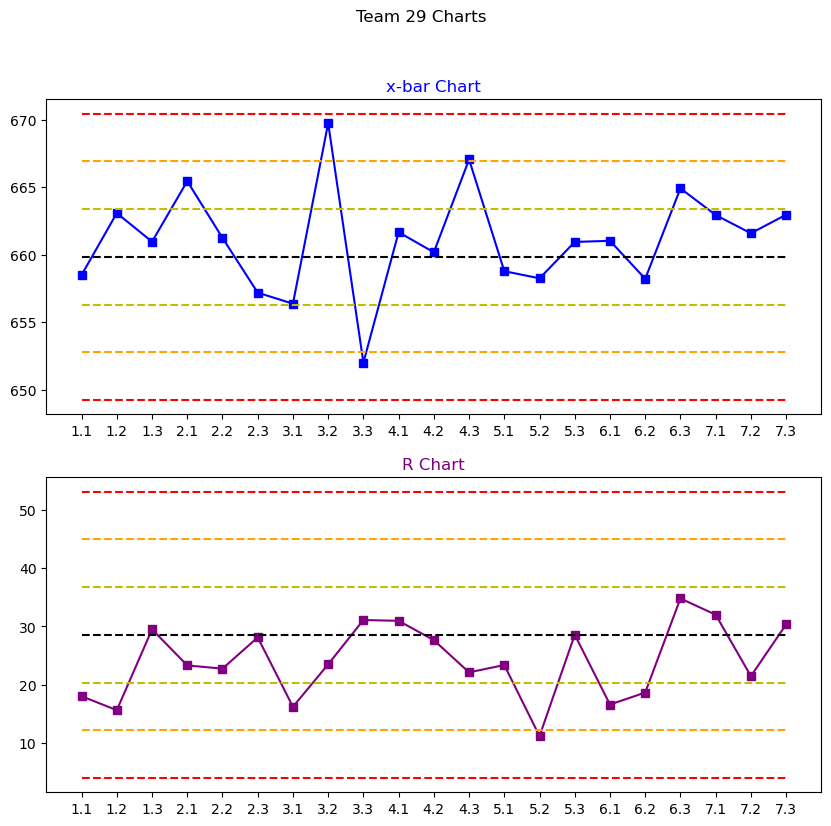

In [799]:
fig = pf.DrawCombinedxBarAndRCharts(xLabels, xBarValues, RValues, xBar_CL, xBar_UCL, xBar_LCL, R_CL, R_UCL, R_LCL)
fig.suptitle('Team ' + str(team) + ' Charts')
plt.show

# Mark any out-of-control observations and trends

In [800]:
def NumPointsPastLimitOnSameSide(points, upperLimit, lowerLimit):
    numPastUpper = 0
    numPastLower = 0
    for point in points:
        if point > upperLimit:
            numPastUpper += 1
        elif point < lowerLimit:
            numPastLower += 1
    return max(numPastUpper, numPastLower)

In [801]:
def WindowsThatBreakRule(points, windowSize, rule, limit, CL):
    windowsOutOfControl = []
    if len(points) >= windowSize:
        for index in range(0, len(points) - (windowSize - 1)):
            window = points[index:index + windowSize]
            if NumPointsPastLimitOnSameSide(window, CL + limit, CL - limit) >= rule:
                windowsOutOfControl.append(window)
    return windowsOutOfControl

In [802]:
xBar_OutOfControl = []

#xBarValues = pd.concat([xBarValues, pd.Series([664, 664, 664, 664])])

for window in WindowsThatBreakRule(xBarValues, 1, 1, 3*stderror, xBar_CL):
    xBar_OutOfControl.append((1, window.values))

for window in WindowsThatBreakRule(xBarValues, 3, 2, 2*stderror, xBar_CL):
    xBar_OutOfControl.append((2, window.values))

for window in WindowsThatBreakRule(xBarValues, 5, 4, stderror, xBar_CL):
    xBar_OutOfControl.append((3, window.values))

for window in WindowsThatBreakRule(xBarValues, 8, 8, 0, xBar_CL):
    xBar_OutOfControl.append((4.1, window.values))

for window in WindowsThatBreakRule(xBarValues, 11, 10, 0, xBar_CL):
    xBar_OutOfControl.append((4.2, window.values))

for window in WindowsThatBreakRule(xBarValues, 14, 12, 0, xBar_CL):
    xBar_OutOfControl.append((4.3, window.values))

for window in WindowsThatBreakRule(xBarValues, 16, 14, 0, xBar_CL):
    xBar_OutOfControl.append((4.4, window.values))

for window in WindowsThatBreakRule(xBarValues, 20, 16, 0, xBar_CL):
    xBar_OutOfControl.append((4.5, window.values))


print(f"These xBar observations are out of control:")
for observation in xBar_OutOfControl:
    print(observation)

These xBar observations are out of control:


In [803]:
R_OutOfControl = []

for R_Value in RValues:
    if R_Value > R_UCL or R_Value < R_LCL:
        R_OutOfControl.append((1, R_Value))

for window in WindowsThatBreakRule(RValues, 3, 2, (R_CL+2*R_UCL)/3 - R_CL, R_CL):
    R_OutOfControl.append((2, window))

for window in WindowsThatBreakRule(RValues, 5, 4, (2*R_CL+R_UCL)/3 - R_CL, R_CL):
    R_OutOfControl.append((3, window))

for window in WindowsThatBreakRule(RValues, 8, 8, 0, R_CL):
    R_OutOfControl.append((4.1, window))

for window in WindowsThatBreakRule(RValues, 11, 10, 0, R_CL):
    R_OutOfControl.append((4.2, window))

for window in WindowsThatBreakRule(RValues, 14, 12, 0, R_CL):
    R_OutOfControl.append((4.3, window))

for window in WindowsThatBreakRule(RValues, 16, 14, 0, R_CL):
    R_OutOfControl.append((4.4, window))

for window in WindowsThatBreakRule(RValues, 20, 16, 0, R_CL):
    R_OutOfControl.append((4.5, window))


print(f"These R observations are out of control:")
for observation in R_OutOfControl:
    print(observation)

These R observations are out of control:


# Process Capability

In [804]:
specification = 660
tolerance = 30
USL = specification + tolerance
LSL = specification - tolerance
Cpk = min((USL - xBar_CL) / (3 * stderror), (xBar_CL - LSL) / (3 * stderror))
Cpk

2.8130687976093247

In [805]:
if Cpk >= 1:
    print("Process is Capable")
else:
    print("Process is not Capable")

Process is Capable
